# Requirements

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 93.6MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df = pd.read_csv("./climate-data.csv")

In [ ]:
df

date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]

Explore the dataset using visualizations of your choice.

In [ ]:
import matplotlib.pyplot as plt

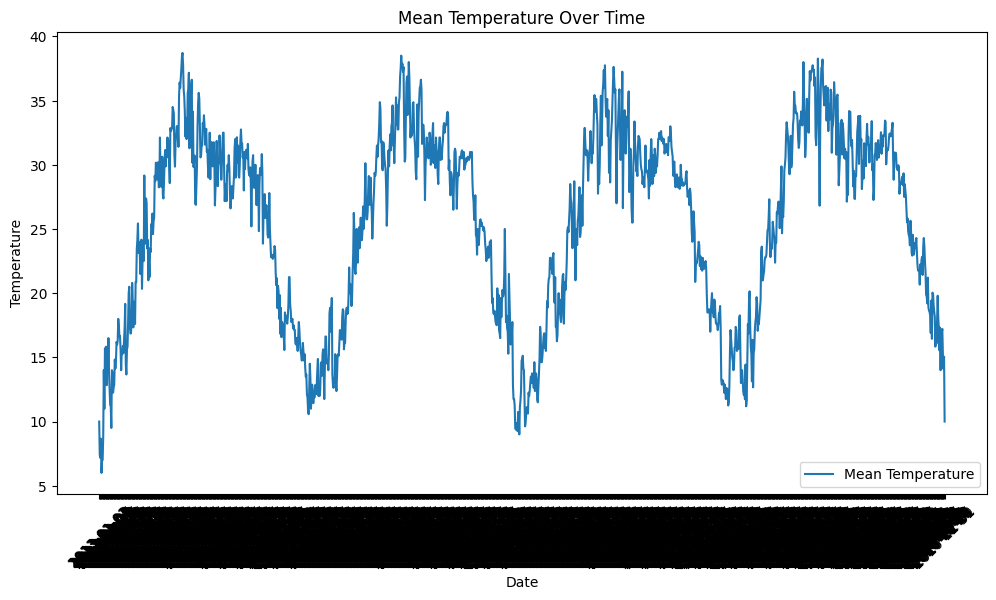

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['meantemp'], label='Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Mean Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

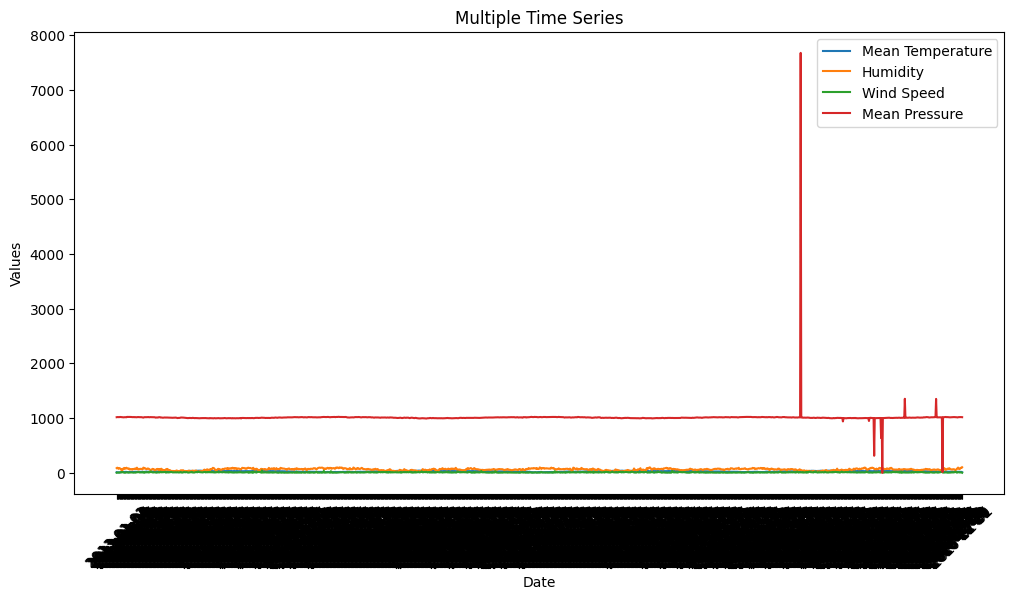

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['meantemp'], label='Mean Temperature')
plt.plot(df['date'], df['humidity'], label='Humidity')
plt.plot(df['date'], df['wind_speed'], label='Wind Speed')
plt.plot(df['date'], df['meanpressure'], label='Mean Pressure')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Multiple Time Series')
plt.xticks(rotation=45)
plt.legend()
plt.show()

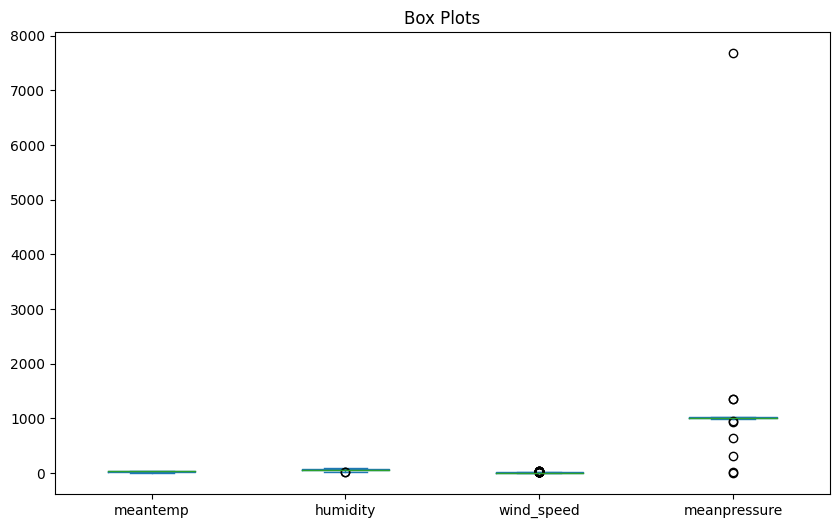

In [ ]:
df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].plot(kind='box', figsize=(10, 6))
plt.title('Box Plots')
plt.show()

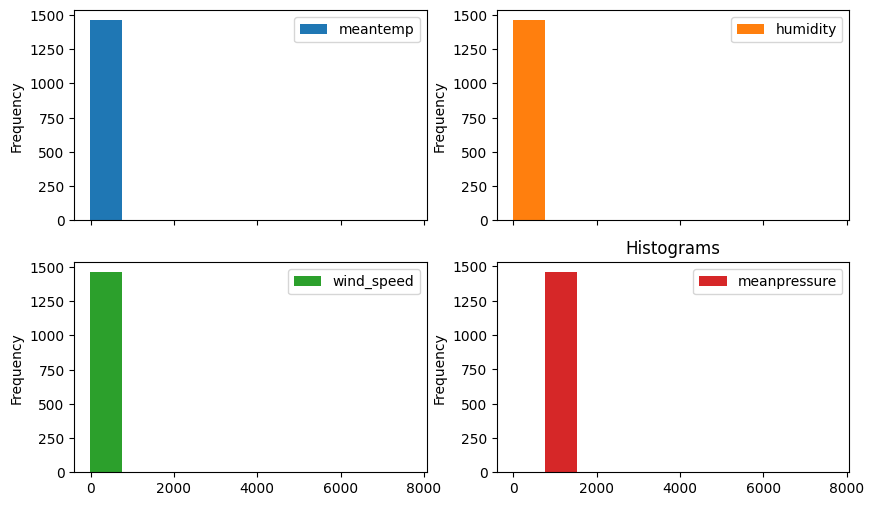

In [ ]:
df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].plot(kind='hist', subplots=True, layout=(2, 2), figsize=(10, 6))
plt.title('Histograms')
plt.show()

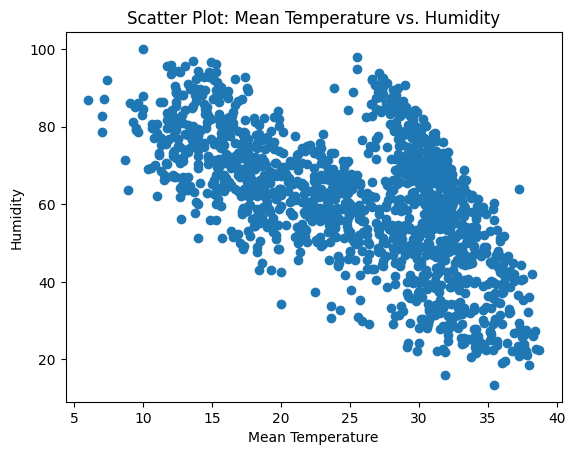

In [ ]:
plt.scatter(df['meantemp'], df['humidity'])
plt.xlabel('Mean Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot: Mean Temperature vs. Humidity')
plt.show()

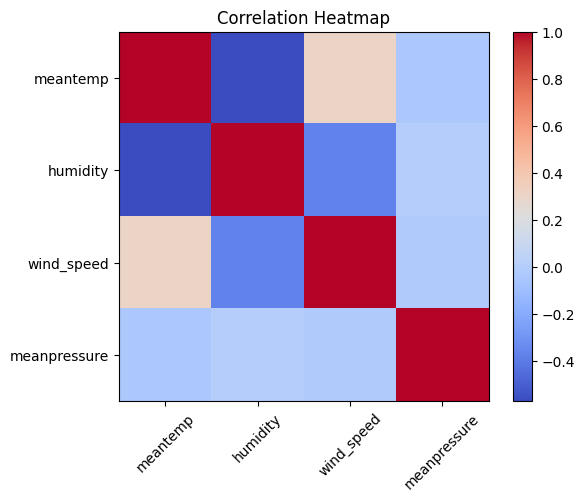

In [ ]:
correlation_matrix = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-13-d3d82de0d723>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='hsv', fmt = '.3f', linewidths = 1)


<Axes: >

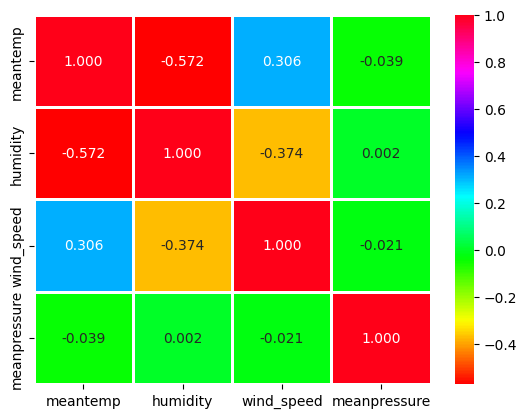

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='hsv', fmt = '.3f', linewidths = 1)

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.
for column in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    df[f'{column}_lag1'] = df[column].shift(1)
    df[f'{column}_lag2'] = df[column].shift(2)
    df[f'{column}_lag3'] = df[column].shift(3)

In [ ]:
df

date   meantemp    humidity  wind_speed  meanpressure  \
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667   
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000   
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667   
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667   
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000   
...          ...        ...         ...         ...           ...   
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217   
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762   
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762   
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000   
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000   

      meantemp_lag1  meantemp_lag2  meantemp_lag3  humidity_lag1  \
0               NaN            NaN            NaN            NaN   
1         10.000000            NaN            NaN      84.500000   
2          7.400000      10.000000            NaN      92.000000   
3          7.166667       7.400000      10.000000      87.000000   
4          8.666667       7.166667       7.400000      71.333333   
...             ...            ...            ...            ...   
1457      16.850000      17.142857      14.000000      67.550000   
1458      17.217391      16.850000      17.142857      68.043478   
1459      15.238095      17.217391      16.850000      87.857143   
1460      14.095238      15.238095      17.217391      89.666667   
1461      15.052632      14.095238      15.238095      87.000000   

      humidity_lag2  humidity_lag3  wind_speed_lag1  wind_speed_lag2  \
0               NaN            NaN              NaN              NaN   
1               NaN            NaN         0.000000              NaN   
2         84.500000            NaN         2.980000         0.000000   
3         92.000000      84.500000         4.633333         2.980000   
4         87.000000      92.000000         1.233333         4.633333   
...             ...            ...              ...              ...   
1457      74.857143      94.300000         8.335000         8.784211   
1458      67.550000      74.857143         3.547826         8.335000   
1459      68.043478      67.550000         6.000000         3.547826   
1460      87.857143      68.043478         6.266667         6.000000   
1461      89.666667      87.857143         7.325000         6.266667   

      wind_speed_lag3  meanpressure_lag1  meanpressure_lag2  meanpressure_lag3  
0                 NaN                NaN                NaN                NaN  
1                 NaN        1015.666667                NaN                NaN  
2                 NaN        1017.800000        1015.666667                NaN  
3            0.000000        1018.666667        1017.800000        1015.666667  
4            2.980000        1017.166667        1018.666667        1017.800000  
...               ...                ...                ...                ...  
1457         9.085000        1017.200000        1016.952381        1014.350000  
1458         8.784211        1015.565217        1017.200000        1016.952381  
1459         8.335000        1016.904762        1015.565217        1017.200000  
1460         3.547826        1017.904762        1016.904762        1015.565217  
1461         6.000000        1016.100000        1017.904762        1016.904762  

[1462 rows x 17 columns]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

date   meantemp    humidity  wind_speed  meanpressure  \
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667   
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000   
5     2013-01-06   7.000000   82.800000    1.480000   1018.000000   
6     2013-01-07   7.000000   78.600000    6.300000   1020.000000   
7     2013-01-08   8.857143   63.714286    7.142857   1018.714286   
...          ...        ...         ...         ...           ...   
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217   
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762   
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762   
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000   
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000   

      meantemp_lag1  meantemp_lag2  meantemp_lag3  humidity_lag1  \
3          7.166667       7.400000      10.000000      87.000000   
4          8.666667       7.166667       7.400000      71.333333   
5          6.000000       8.666667       7.166667      86.833333   
6          7.000000       6.000000       8.666667      82.800000   
7          7.000000       7.000000       6.000000      78.600000   
...             ...            ...            ...            ...   
1457      16.850000      17.142857      14.000000      67.550000   
1458      17.217391      16.850000      17.142857      68.043478   
1459      15.238095      17.217391      16.850000      87.857143   
1460      14.095238      15.238095      17.217391      89.666667   
1461      15.052632      14.095238      15.238095      87.000000   

      humidity_lag2  humidity_lag3  wind_speed_lag1  wind_speed_lag2  \
3         92.000000      84.500000         4.633333         2.980000   
4         87.000000      92.000000         1.233333         4.633333   
5         71.333333      87.000000         3.700000         1.233333   
6         86.833333      71.333333         1.480000         3.700000   
7         82.800000      86.833333         6.300000         1.480000   
...             ...            ...              ...              ...   
1457      74.857143      94.300000         8.335000         8.784211   
1458      67.550000      74.857143         3.547826         8.335000   
1459      68.043478      67.550000         6.000000         3.547826   
1460      87.857143      68.043478         6.266667         6.000000   
1461      89.666667      87.857143         7.325000         6.266667   

      wind_speed_lag3  meanpressure_lag1  meanpressure_lag2  meanpressure_lag3  
3            0.000000        1018.666667        1017.800000        1015.666667  
4            2.980000        1017.166667        1018.666667        1017.800000  
5            4.633333        1016.500000        1017.166667        1018.666667  
6            1.233333        1018.000000        1016.500000        1017.166667  
7            3.700000        1020.000000        1018.000000        1016.500000  
...               ...                ...                ...                ...  
1457         9.085000        1017.200000        1016.952381        1014.350000  
1458         8.784211        1015.565217        1017.200000        1016.952381  
1459         8.335000        1016.904762        1015.565217        1017.200000  
1460         3.547826        1017.904762        1016.904762        1015.565217  
1461         6.000000        1016.100000        1017.904762        1016.904762  

[1459 rows x 17 columns]

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is called 'df' and the target column is 'meantemp'
  X = df.drop(columns=['date', 'meantemp'])  # Features (excluding 'date' and 'meantemp')
  y = df['meantemp']  # Target variable

# Split the dataset into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=False)

# X_train and y_train are your training data and labels
# X_test and y_test are your testing data and labels


## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = MinMaxScaler()

# # Fit the scaler on the training data and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize separate scalers for features and the target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit and transform the feature scaler on the training features
X_train_scaled = feature_scaler.fit_transform(X_train)

# Transform the test features with the fitted feature scaler
X_test_scaled = feature_scaler.transform(X_test)

# Fit and transform the target scaler on the training target variable
Y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test target variable with the fitted target scaler
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))


## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [ ]:
X_train.shape

(1313, 15)

In [ ]:
X_train = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)

In [ ]:
 X_test = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [ ]:
X_train.shape

(1313, 15, 1)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [ ]:
# Write your code here. Add as many boxes as you need.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [ ]:
# Write your code here. Add as many boxes as you need.
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

NameError: name 'keras' is not defined

In [ ]:
model.summary()

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, Y_train_scaled,
    batch_size=16,
    validation_split=0.2,
    epochs=20,
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/20
66/66 [==============================] - 5s 23ms/step - loss: 0.1280 - mean_absolute_error: 0.3043 - val_loss: 0.0690 - val_mean_absolute_error: 0.2133
Epoch 2/20
66/66 [==============================] - 1s 18ms/step - loss: 0.0737 - mean_absolute_error: 0.2321 - val_loss: 0.0586 - val_mean_absolute_error: 0.2013
Epoch 3/20
66/66 [==============================] - 1s 18ms/step - loss: 0.0676 - mean_absolute_error: 0.2191 - val_loss: 0.0593 - val_mean_absolute_error: 0.2011
Epoch 4/20
66/66 [==============================] - 1s 18ms/step - loss: 0.0652 - mean_absolute_error: 0.2152 - val_loss: 0.0562 - val_mean_absolute_error: 0.1963
Epoch 5/20
66/66 [==============================] - 1s 19ms/step - loss: 0.0620 - mean_absolute_error: 0.2086 - val_loss: 0.0533 - val_mean_absolute_error: 0.1897
Epoch 6/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0582 - mean_absolute_error: 0.2008 - val_loss: 0.0475 - val_mean_absolute_error: 0.1765
Epoch 7/20
66/66 [====

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

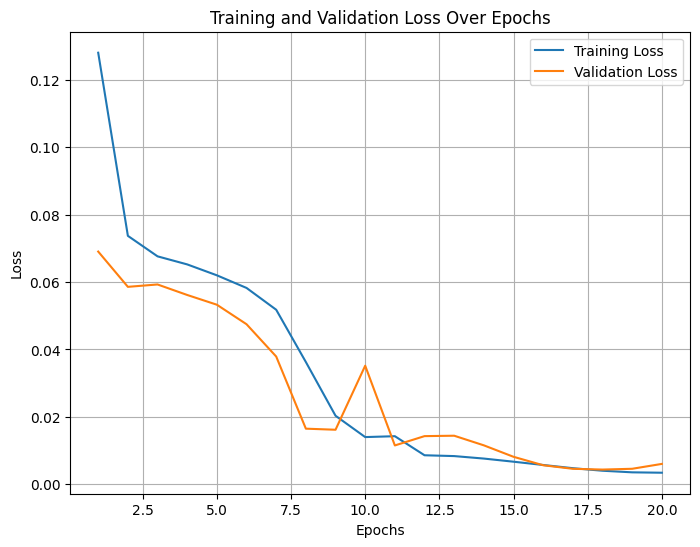

In [ ]:

# Extracting loss and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating the epoch range (starting from 1)
epochs_range = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
preds = model.predict(X_test)

In [ ]:
# After making predictions with the model
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled)


5/5 [==============================] - 1s 17ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)


Mean Squared Error (MSE): 2.679158660010785
Mean Absolute Error (MAE): 1.3705473962974477
R-squared (R^2) Score: 0.8903378522668457


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_rescaled))
print("Root Mean Squared Error (RMSE):", rmse)

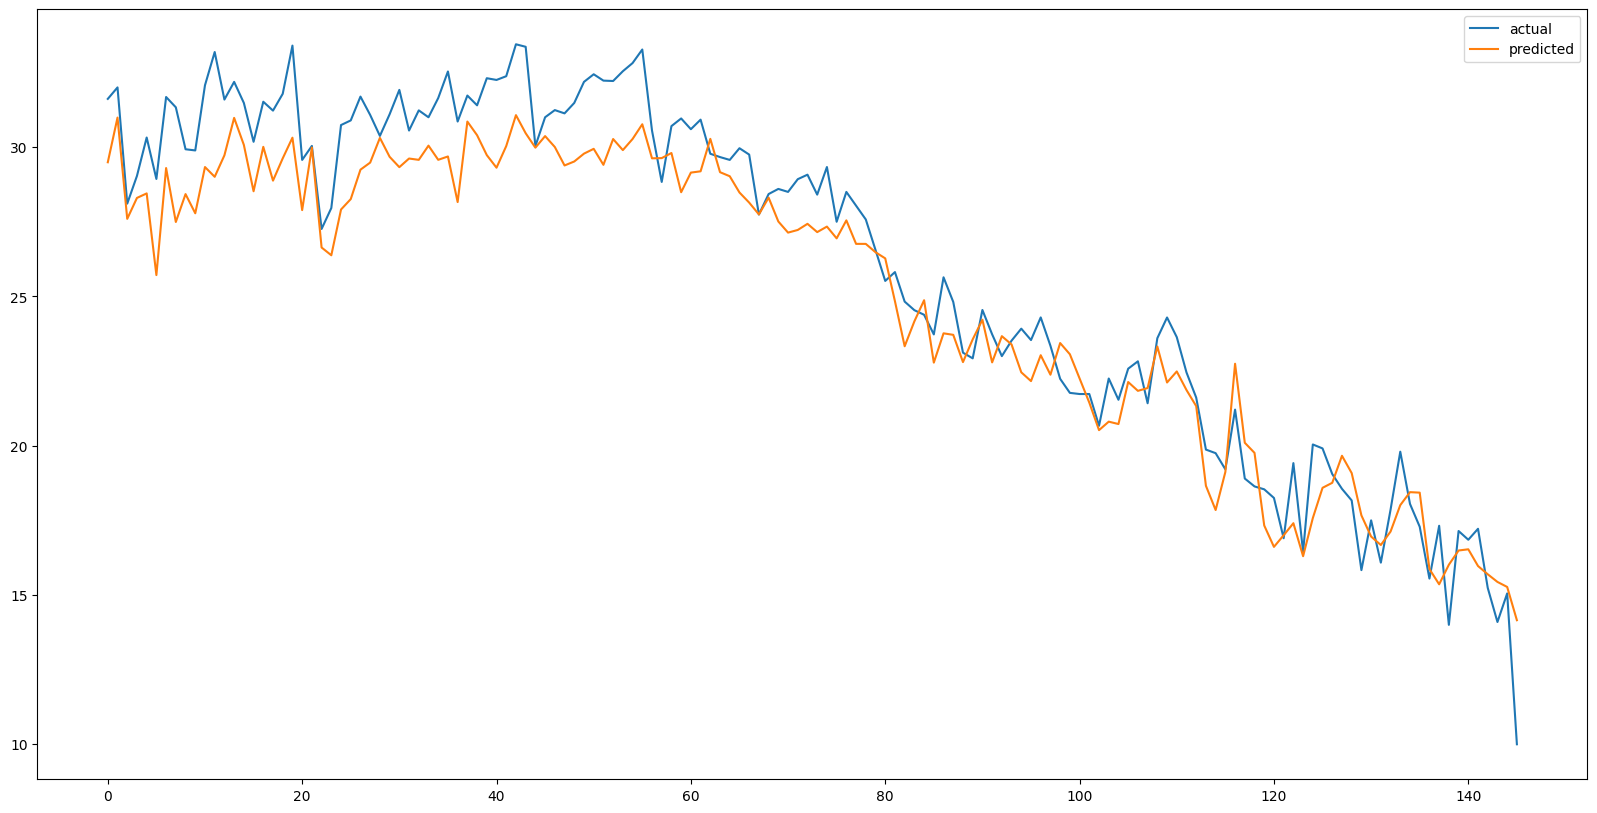

In [ ]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [ ]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [ ]:
# df = pd.read_csv('wine-reviews.csv')

In [ ]:
df.head()

## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [ ]:
# df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
X, y = df['description'], df['exceptional']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Padding
Pad each sequence to maximum length of 16.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [ ]:
# Write your code here. Add as many boxes as you need.

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
print(classification_report(y_test, np.round(y_pred)))